In [56]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Настройка стилей
plt.style.use('dark_background')
plt.rcParams.update({'figure.facecolor':'#2b2b2b',
                     'axes.facecolor':'#3c3c3c',
                     'axes.edgecolor': '#2b2b2b',
                     'grid.alpha': 0.1})

In [4]:
# Считывание данных
data = pd.read_csv("kc-house-data.csv")

# Задание 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

## 1.1. Изучите стоимости недвижимости

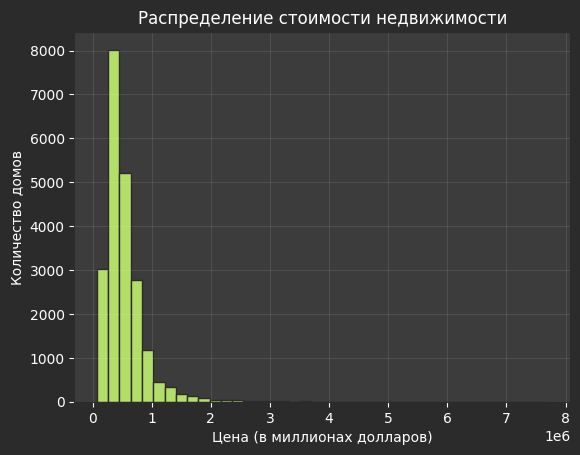

In [75]:
# Построение гистограммы стоимости недвижимости
plt.hist(data['price'], bins=40, color='C6', edgecolor='#2b2b2b')

# Подписи на графике
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена (в миллионах долларов)')
plt.ylabel('Количество домов')
plt.grid(True)

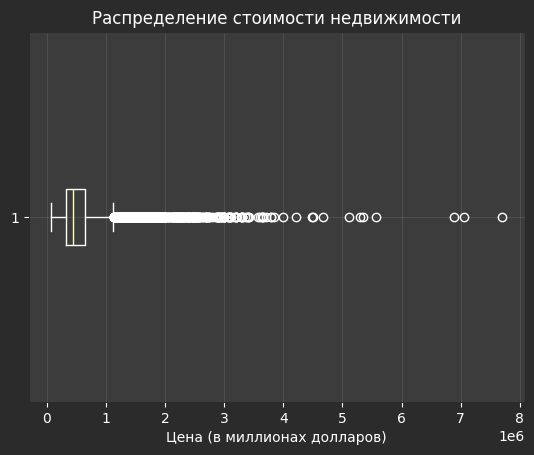

In [23]:
# Построение ящика с усами для стоимости недвижимости
plt.boxplot(data['price'], vert=False)

# Название графика и именование осей
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена (в миллионах долларов)')
plt.grid(True)

In [44]:
# Характеристики
data.agg({'price': ['min', 'median', 'max']})

,price
min,75000.0
median,450000.0
max,7700000.0


### **Вывод:**
1.  Большинство домов имеют стоимость в пределах от нескольких сотен тысяч до одного миллиона долларов.
2.  Характеристики диапозона:  
    * Минимум: `75 000 $`
    * Медиана: `450 000 $`
    * Максимум: `7 700 000 $`
3.  Есть небольшое количество домов с очень высокими ценами, что указывает на наличие роскошных объектов недвижимости в наборе данных.

## 1.2. Изучите распределение квадратуры жилой

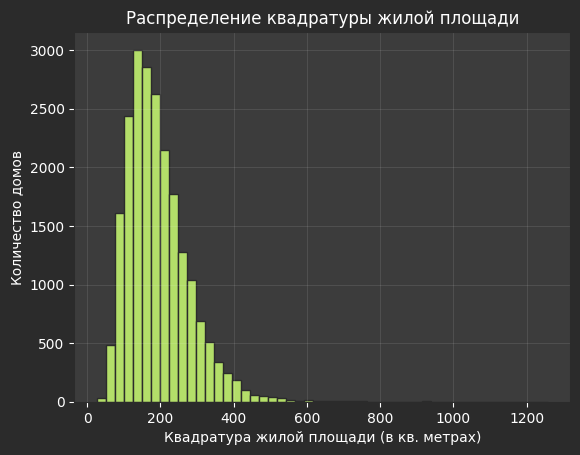

In [53]:
# Построение гистограммы квадратуры жилой площади
data['sqft_living_m2'] = data['sqft_living'] * 0.092903
plt.hist(data['sqft_living_m2'], bins=50, color='C6', edgecolor='#2b2b2b')

# Название графика и именование осей
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади (в кв. метрах)')
plt.ylabel('Количество домов')
plt.grid(True)

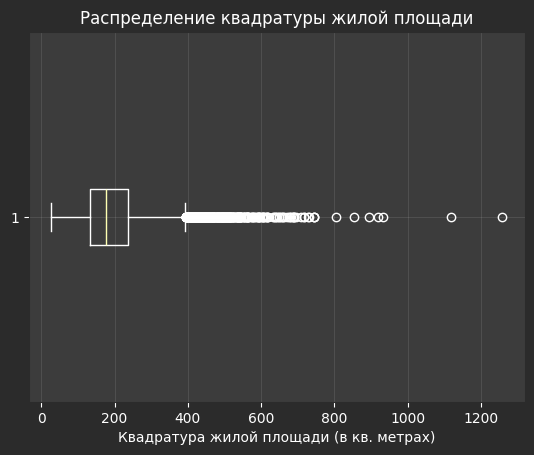

In [54]:
# Построение ящика с усами для квадратуры жилой площади
plt.boxplot(data['sqft_living_m2'], vert=False)

# Название графика и именование осей
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура жилой площади (в кв. метрах)')
plt.grid(True)

In [55]:
# Характеристики
data['sqft_living_m2'].agg(['min', 'median', 'max'])

min         26.94187
median     177.44473
max       1257.90662
Name: sqft_living_m2, dtype: float64

### **Вывод:**
1.  Большинство домов имеют площадь в размере от нескольких десятков до 400 кв м.
2.  Характеристики диапозона:  
    * Минимум: `26.94 кв.м`
    * Медиана: `177.44 кв.м`
    * Максимум: `1 257.90 кв.м`
3. Есть небольшое количество объектов недвижимости с очень большой площадью, что указывает на наличие роскошных и просторных домов в наборе данных.

### 1.3. Изучите распределение года постройки

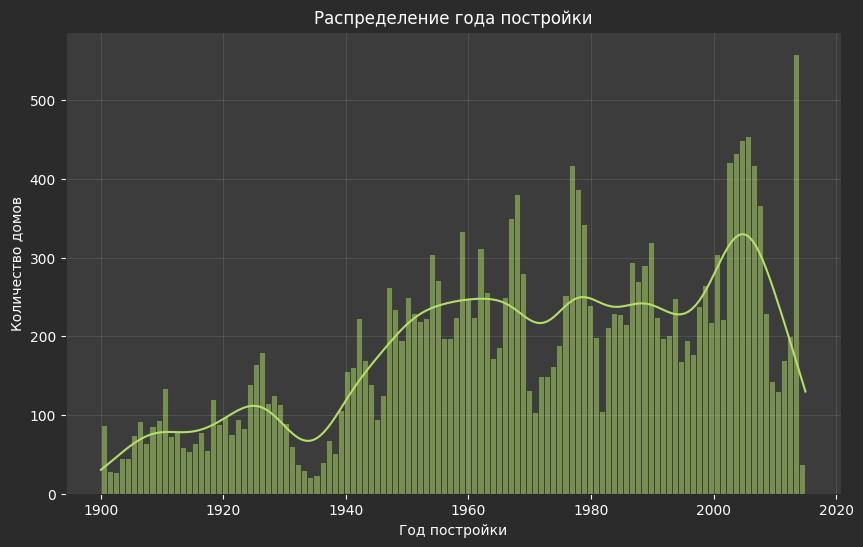

In [78]:
# Построение графика плотности распределения года постройки
plt.figure(figsize=(10, 6))
sns.histplot(data['yr_built'], kde=True, color='C6', edgecolor='#2b2b2b', bins=116)

# Название графика и именование осей
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.grid(True)

In [64]:
# Характеристики
data['yr_built'].agg(['min', 'median', 'max'])

min       1900.0
median    1975.0
max       2015.0
Name: yr_built, dtype: float64

In [63]:
# Год рекордной застрйоки
max_year_built = data['yr_built'].value_counts().idxmax()
houses_built_in_max_year = data['yr_built'].value_counts()[max_year_built]
max_year_built, houses_built_in_max_year

(2014, 559)

### **Вывод:**
1.  Распределение года постройки не является равномерным, что может указывать на сезонность или тенденции в строительстве.
2. Можно выделить несколько "пиков" или характерных периодов строительства. Больше всего построено довом было в 2014г (559 домов)
3.  Характеристики диапозона:  
    * Минимум: `1900 г`
    * Медиана: `1975 г`
    * Максимум: `2015 г`

# Задание 2
* Постройте график
* Сделайте выводы

## 2.1. Изучите распределение домов от наличия вида на набережную

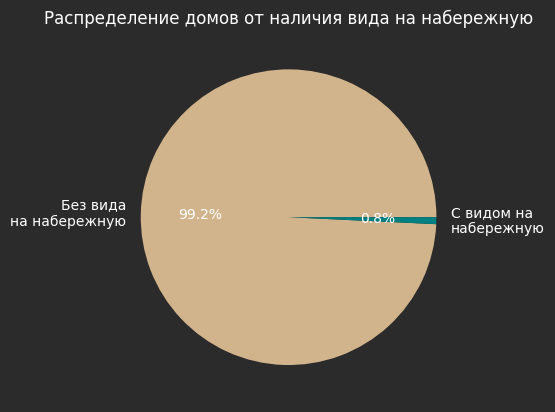

In [90]:
# Подсчет количества домов с видом на набережную и без такого вида
waterfront_counts = data['waterfront'].value_counts()

# Построение круговой диаграммы
plt.pie(waterfront_counts, labels=['Без вида\nна набережную', 'С видом на\nнабережную'], autopct='%1.1f%%', colors=['tan', 'teal'])
plt.title('Распределение домов от наличия вида на набережную');

In [113]:
# Кол-во домов с видом на набережную
data[data['waterfront'] == 1].shape[0]

163

### **Вывод:**
1. Из круговой диаграммы видно, что большинство домов в наборе данных не имеют вид на набережную `99.2 %`.
2. Только небольшая доля домов имеет вид на набережную `0,8 %` (163 дома)

## 2.2. Изучите распределение этажей домов

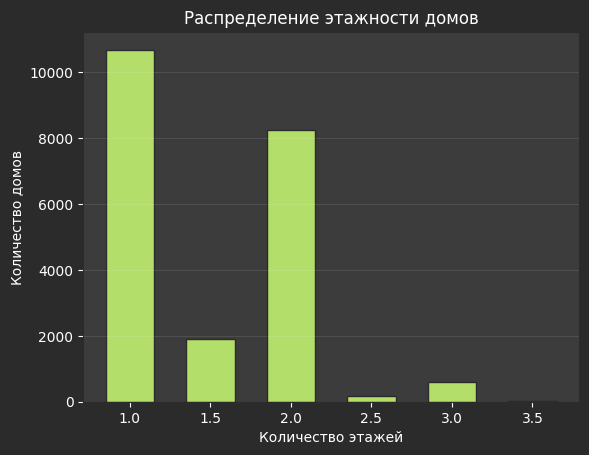

In [109]:
# Подсчет количества домов для каждого значения этажности
floor_counts = data['floors'].value_counts().sort_index()

# Построение столбчатой диаграммы
plt.bar(floor_counts.index, floor_counts.values, color='C6', edgecolor='#2b2b2b', width=0.3)

# Название графика и именование осей
plt.title('Распределение этажности домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов')
plt.grid(axis='y')

### **Вывод:**
На гистограмме видно, что большинство домов имеют `1` или `2 этажа`.

## 2.3. Изучите распределение состояния домов

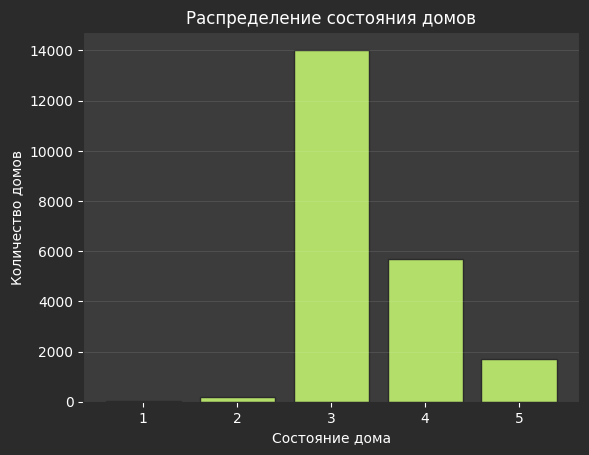

In [114]:
# Подсчет количества домов для каждого состояния
condition_counts = data['condition'].value_counts().sort_index()

# Построение столбчатой диаграммы
plt.bar(condition_counts.index, condition_counts.values, color='C6', edgecolor='#2b2b2b')

# Название графика и именование осей
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов')
plt.grid(axis='y')

In [115]:
# Сколько домов в отличном состоянии
num_excellent_condition_houses = data[data['condition'] == 5].shape[0]
percentage_excellent_condition = (num_excellent_condition_houses / data.shape[0]) * 100
num_excellent_condition_houses, percentage_excellent_condition

(1701, 7.870263267477908)

### **Вывод:**
1. Большинство домов имеют среднее состояние.
2. Лишь 1 701 домов имеют отличное состояние, это около 7,8 % от всех домов.

## Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 различных диаграмм.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 1. График зависимости цены от общей площади дома:

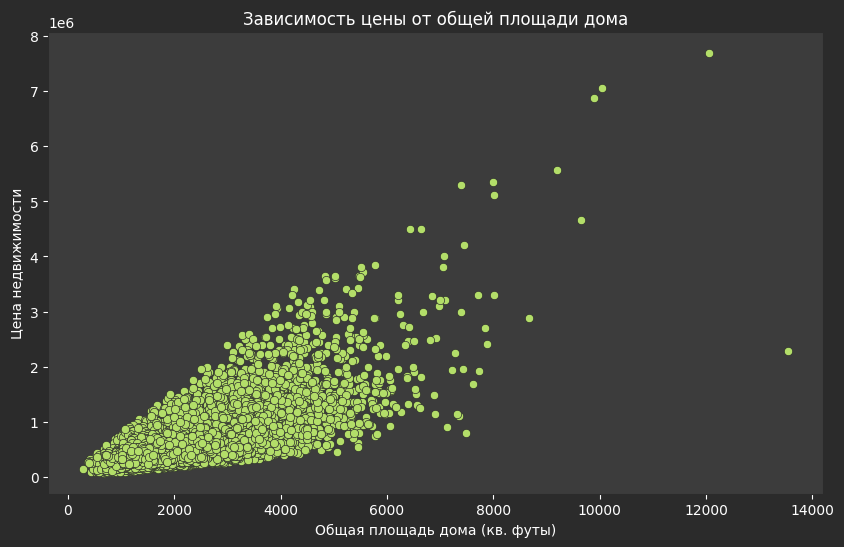

In [120]:
# Построение графика
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, color='C6', edgecolor='#2b2b2b')

# Название графика и именование осей
plt.title('Зависимость цены от общей площади дома')
plt.xlabel('Общая площадь дома (кв. футы)')
plt.ylabel('Цена недвижимости');

### **Вывод:**
1. Наблюдается положительная корреляция между общей площадью дома и его ценой: чем больше площадь, тем выше цена.
2. Однако есть объекты с высокой ценой, но относительно небольшой площадью, что может быть связано с другими факторами, такими как расположение, вид на набережную и другие.

### 2. График зависимости цены от этажности дома:

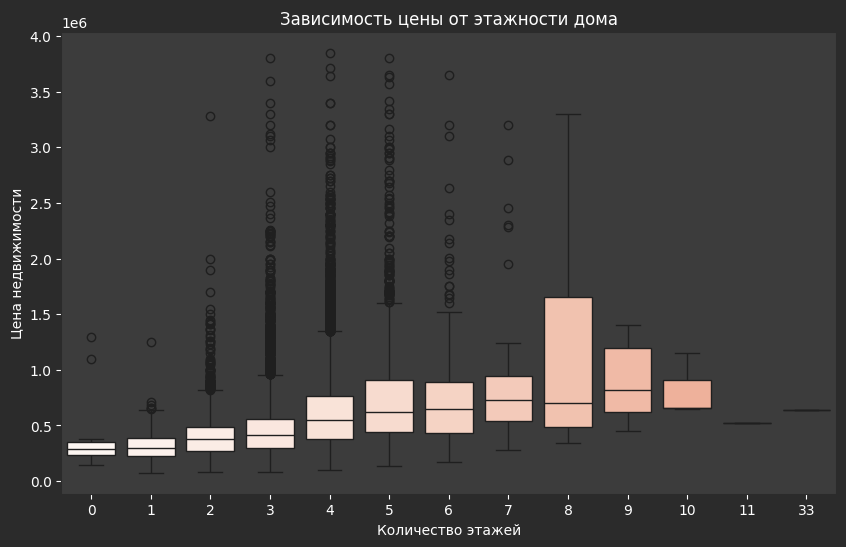

In [131]:
# Создание нового DataFrame с домами стоимостью ниже 4 млн долларов
affordable_houses = data[data['price'] < 4e6]

# Построение графика
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=affordable_houses, hue='bedrooms', palette='Reds', legend=False)

# Название графика и именование осей
plt.title('Зависимость цены от этажности дома')
plt.xlabel('Количество этажей')
plt.ylabel('Цена недвижимости');

### **Вывод:**
Для наглядности были отобраны дома стоимостью до 4 млн $

На графике видно, что цена недвижимости может варьироваться в зависимости от этажности дома.
Объекты с более высоким количеством этажей имеют более высокие цены, но также имеются выбросы.

### 3. График зависимости цены от состояния дома

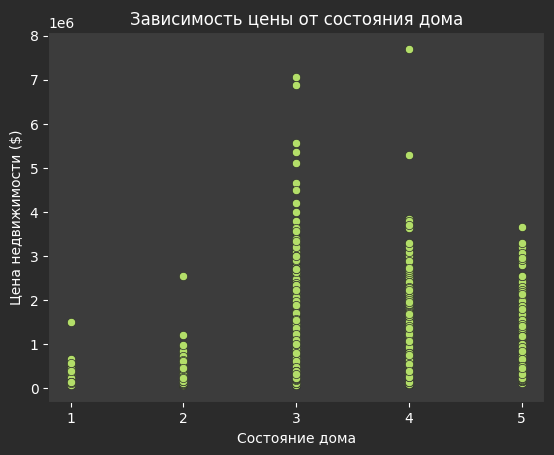

In [135]:
# Построение графика
sns.scatterplot(x='condition', y='price', data=data, color='C6', edgecolor='#2b2b2b')

# Название графика и именование осей
plt.title('Зависимость цены от состояния дома')
plt.xticks(range(1, 6)) 
plt.xlabel('Состояние дома')
plt.ylabel('Цена недвижимости ($)');

### **Вывод:**
1. На графике видно, что есть некоторая корреляция между состоянием дома и его ценой.
2. Дома в лучшем состоянии (с высоким рейтингом) имеют более высокие цены, в то время как дома с более низким рейтингом имеют более низкие цены.
3. Однако, стоит отметить, что есть много выбросов в данных, что может быть связано с другими факторами, такими как местоположение, размер участка, вид на набережную и т. д.